# Google Play Store App Dataset Project



# 1- Import Packages

In [110]:
# munging imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

# modeling imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from statistics import mean
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# 2- Read the dataset

In [111]:
df = pd.read_csv('Google-Playstore.CSV')

In [112]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,26-Feb-20,26-Feb-20,Everyone,https://beniyizibyose.tk/projects/,False,False,False,6/15/2021 20:19
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,21-May-20,6-May-21,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,6/15/2021 20:19
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,9-Aug-19,19-Aug-19,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,6/15/2021 20:19
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,10-Sep-18,13-Oct-18,Everyone,NaN,True,False,False,6/15/2021 20:19
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,21-Feb-20,12-Nov-18,Everyone,http://www.horodyski.com.pl,False,False,False,6/15/2021 20:19


# 3- Data cleaning

In [113]:
df.shape

(1048575, 24)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1048574 non-null  object 
 1   App Id             1048575 non-null  object 
 2   Category           1048575 non-null  object 
 3   Rating             1038265 non-null  float64
 4   Rating Count       1038265 non-null  float64
 5   Installs           1048529 non-null  object 
 6   Minimum Installs   1048529 non-null  float64
 7   Maximum Installs   1048575 non-null  int64  
 8   Free               1048575 non-null  bool   
 9   Price              1048575 non-null  float64
 10  Currency           1048513 non-null  object 
 11  Size               1048483 non-null  object 
 12  Minimum Android    1045657 non-null  object 
 13  Developer Id       1048565 non-null  object 
 14  Developer Website  703358 non-null   object 
 15  Developer Email    1048567 non-n

In [115]:
df.duplicated().sum()

0

In [116]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,1.038265e+06,1.038265e+06,1.048529e+06,1.048575e+06,1.048575e+06
mean,2.205133e+00,2.937382e+03,1.761995e+05,3.044571e+05,1.019689e-01
std,2.106423e+00,2.559674e+05,1.325964e+07,2.046633e+07,2.538256e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,3.000000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.361000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,5.000000e+09,9.766231e+09,4.000000e+02


In [117]:
df.isna().sum()

App Name                  1
App Id                    0
Category                  0
Rating                10310
Rating Count          10310
Installs                 46
Minimum Installs         46
Maximum Installs          0
Free                      0
Price                     0
Currency                 62
Size                     92
Minimum Android        2918
Developer Id             10
Developer Website    345217
Developer Email           8
Released              32033
Last Updated              0
Content Rating            0
Privacy Policy       190657
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [118]:
df_dropna=df.dropna()
df_dropna.shape

(583125, 24)

By using dropna() function we lost the half rows nearly ...

# 4-EDA

# Which category has more Apps?

In [119]:
df ['Category'].value_counts()

Education                  109089
Music & Audio               70311
Tools                       65331
Business                    65008
Entertainment               62673
Lifestyle                   53838
Books & Reference           53030
Personalization             40464
Health & Fitness            37770
Productivity                36184
Shopping                    34292
Food & Drink                33480
Travel & Local              30502
Finance                     29625
Arcade                      24425
Puzzle                      23104
Casual                      22846
Communication               21774
Sports                      21435
Social                      20336
News & Magazines            19398
Photography                 16366
Medical                     14402
Action                      12551
Maps & Navigation           12137
Adventure                   10570
Simulation                  10507
Educational                  9561
Art & Design                 8489
Auto & Vehicle

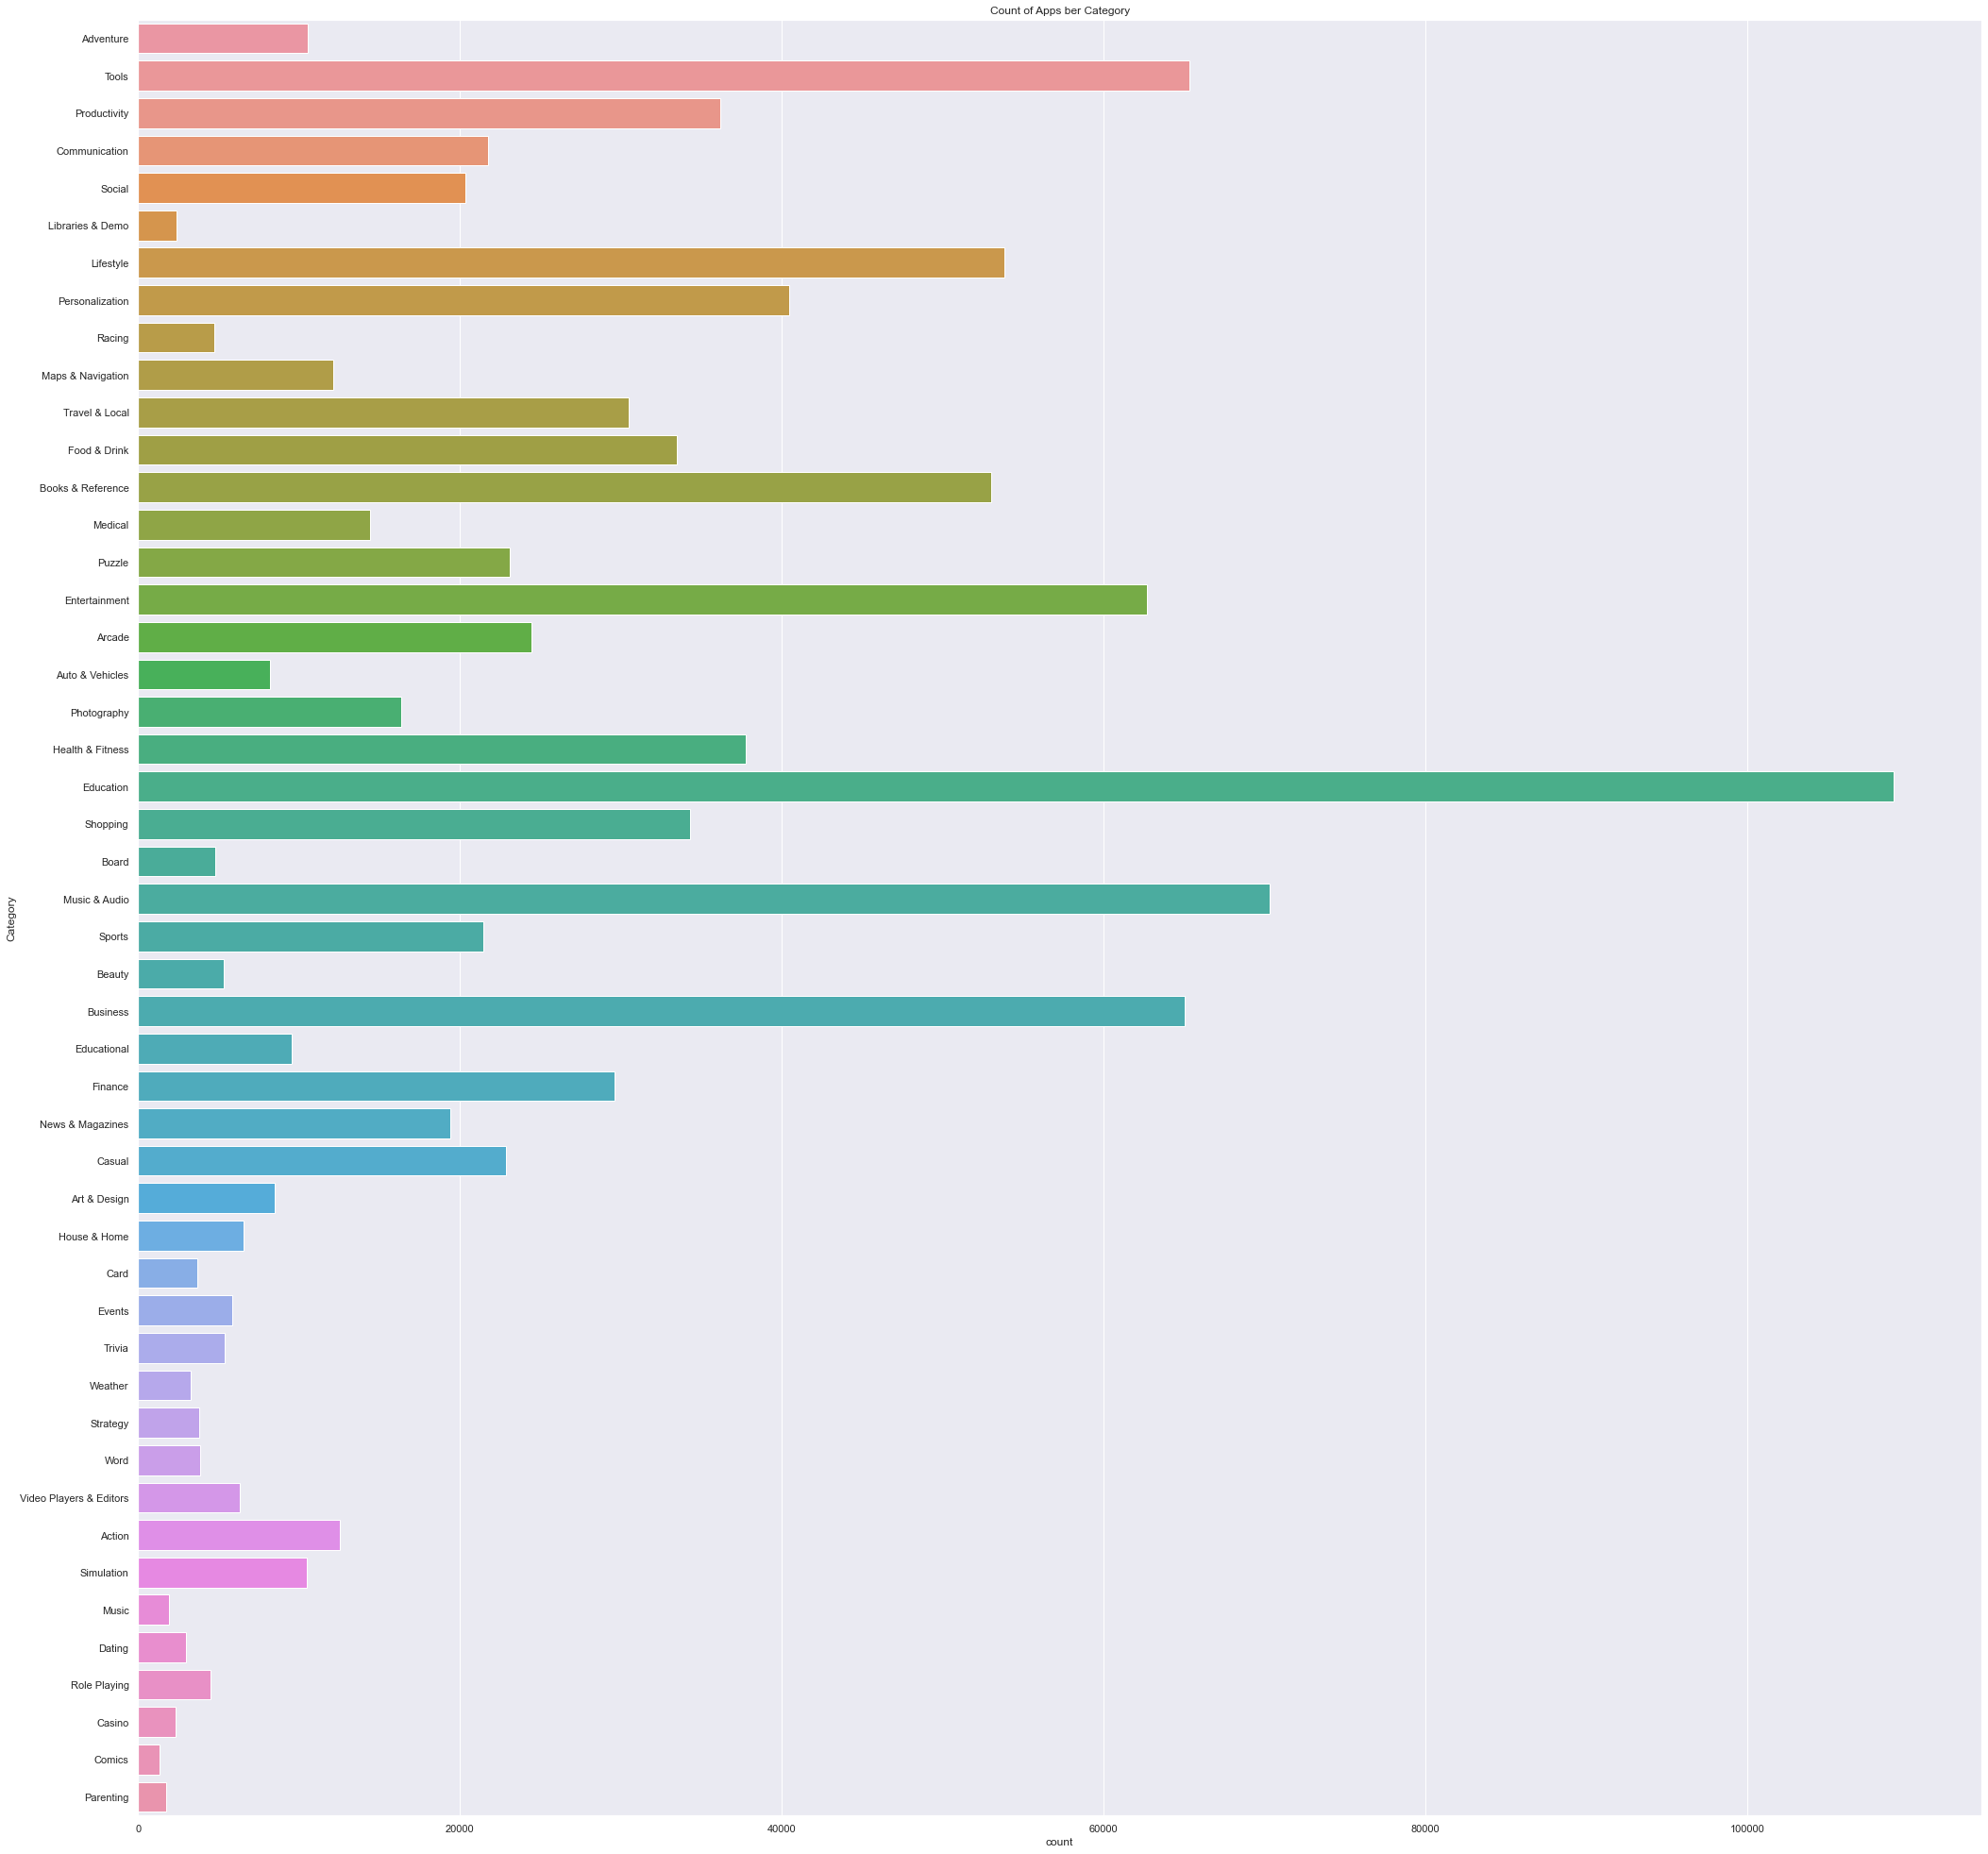

In [120]:
plt.figure(figsize=(35,35))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y=df['Category']);
plt.title("Count of Apps ber Category")

    
plt.show()

By applying value_counts() function and using countplot we can see the most Apps belongs to "Education" category followed by "Music & Audio" and "Comics" has the least Apps. The following graph will clarify that.

In [121]:
df["Installs"]=df["Installs"].replace({"100+":"Too Low Installed",
                                       "1,000+":"Too Low Installed",
                                       "10+":"Too Low Installed",
                                       "500+":"Too Low Installed",
                                       "50+":"Too Low Installed",
                                       "5+":"Too Low Installed",
                                       "1+":"Too Low Installed",
                                       "0+":"Too Low Installed",
                                       "10,000+":"Low Installed",
                                       "5,000+":"Low Installed",
                                       "100,000+":"Low Installed",
                                       "50,000+":"Low Installed",
                                       "1,000,000+":"Medium Installed",
                                       "500,000+":"Medium Installed",
                                       "5,000,000+":"Highly Installed",
                                       "10,000,000+":"Highly Installed",
                                       "50,000,000+":"Highly Installed",
                                       "100,000,000+":"Highly Installed",
                                       "500,000,000+":"Too Highly Installed",
                                       "1,000,000,000+":"Too Highly Installed",
                                       "5,000,000,000+":"Too Highly Installed",
                                       "10,000,000,000+":"Too Highly Installed"
                                       })

In [122]:
df['Installs'].value_counts()

Too Low Installed       748785
Low Installed           265959
Medium Installed         27379
Highly Installed          6347
Too Highly Installed        59
Name: Installs, dtype: int64

To make Installs class more efficient I have reclassifying the labels to 5 labels: Too Low Installed, Low Installed,Medium Installed,Highly Installed, and Too Highly Installed.

# To which Installs label the maximum installs Apps belongs?

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


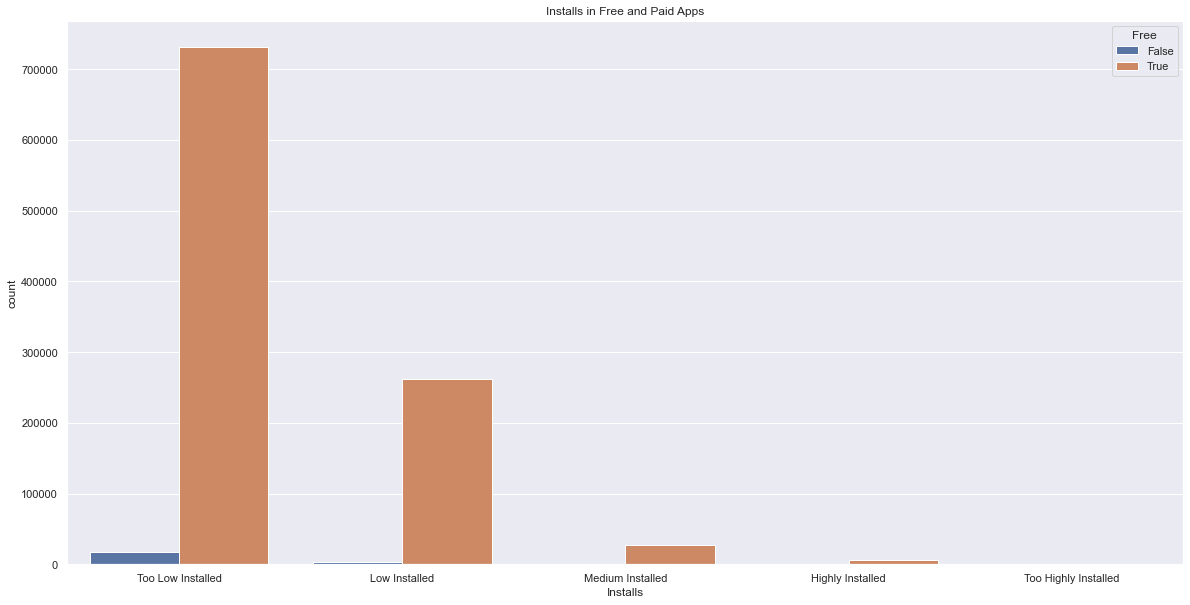

In [123]:
#Add xlabel ("x 6m")
plt.figure(figsize=(20,10))
ax = sns.countplot(df['Installs'],hue=df["Free"]);
plt.title("Installs in Free and Paid Apps")
    
plt.show()

In [124]:
df.groupby('Price')['Maximum Installs'].sum().sort_values()

##draw here 
##discover who is the most downloaded app when it is not free
##add static method to show and profe the diff between free and not free app (739123155435)
dfFree=df[df['Price']==0]    
print("total number of installs when it is free: ",dfFree['Maximum Installs'].sum()) 

dfFree=df[df['Price']!=0]    
print("total number of installs when it is not free: ", dfFree['Maximum Installs'].sum())

total number of installs when it is free:  318872231712
total number of installs when it is not free:  373907463


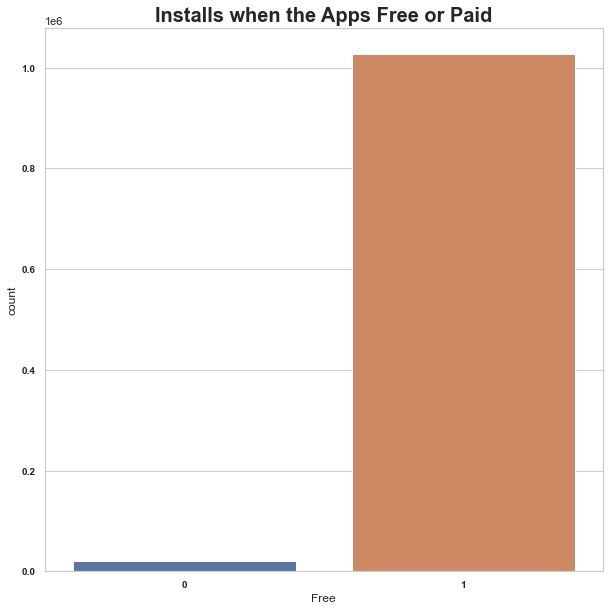

In [232]:
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=df['Free']);
plt.title("Installs when the Apps Free or Paid",fontsize=20,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold');
plt.yticks(fontsize=10,fontweight='bold');

[]

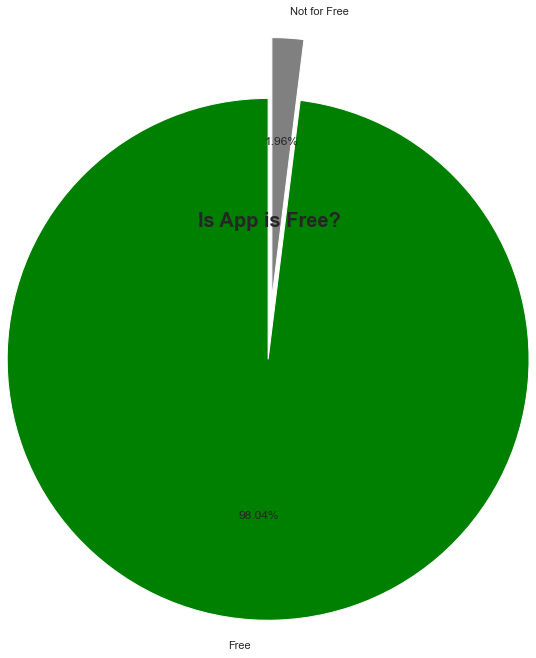

In [234]:
plt.pie(df.Free.value_counts(),radius=3,autopct='%0.2f%%',explode=[0.2,0.5],colors=['#008000','#808080'],labels=['Free','Not for Free'],
        startangle=90)
plt.title('Is App is Free?',fontdict={'size':20,'weight':'bold'})
plt.plot()

In [129]:
df.Free.value_counts()

True     1028002
False      20573
Name: Free, dtype: int64

From this information we can say the number of installs when the app free is clearly higher than when it has price.

<AxesSubplot:ylabel='Installs'>

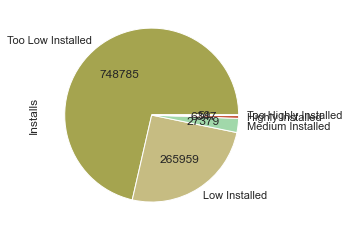

In [130]:
states = df['Installs'].value_counts()
colors = ['#e91e63','#59dce2','#1982bc','#4caf50']
colors = ['#a5a44f', '#c6bc82', '#a1d8aa', '#c85a41','#ffdd01','#6fa96f','#56accc','#c85a41']
states.plot.pie(autopct=lambda x: '{:.0f}'.format(x*states.sum()/100), colors = colors )

In [20]:
df['Rating'].value_counts()

0.0    480073
5.0     45469
4.2     39907
4.4     39084
4.3     37813
4.6     35522
4.5     35068
4.1     31625
4.0     30427
4.7     28284
4.8     27663
3.9     25139
3.8     24406
4.9     20271
3.7     19724
3.6     16295
3.5     14376
3.4     13264
3.3     10202
3.2      9807
3.0      7878
3.1      6987
2.8      5484
2.9      5219
2.6      4180
2.7      4178
2.5      3071
2.4      2737
2.3      2417
2.2      2271
2.0      1687
2.1      1683
1.8      1323
1.9      1190
1.7       893
1.6       751
1.5       519
1.4       463
1.0       317
1.3       272
1.2       212
1.1       114
Name: Rating, dtype: int64

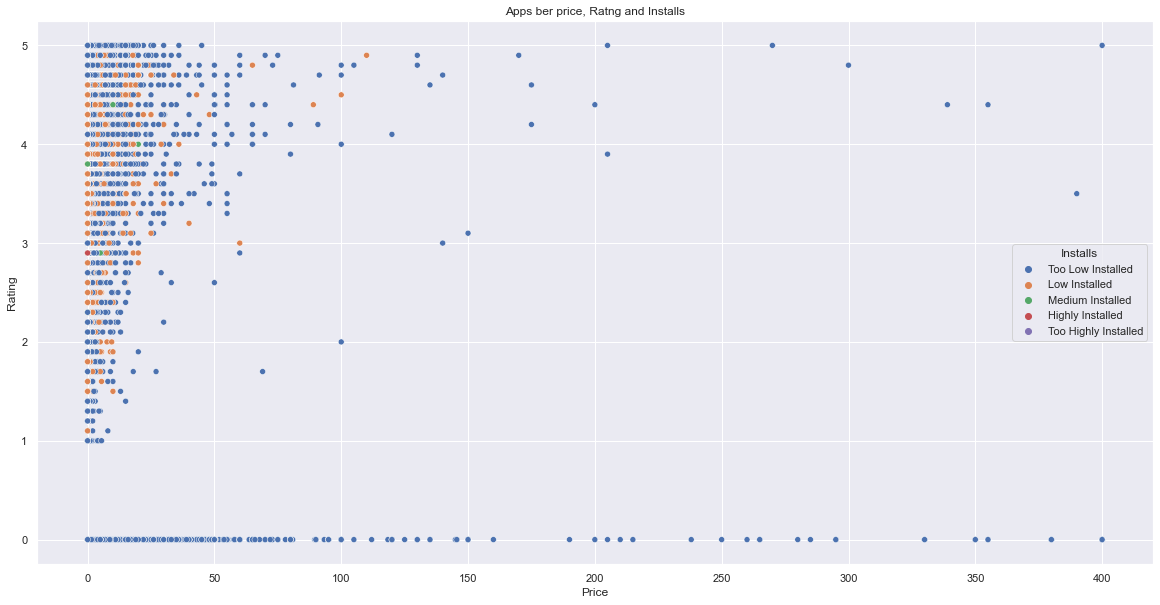

In [131]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(y=df['Rating'],x=df["Price"],hue=df['Installs'],color = '#b0b39d');
plt.title("ِApps ber price, Ratng and Installs")

plt.show()

From this scatterplot we can notice most of Apps that have higher price have high rate (3 and above), and most of then belongs to "Too Low Installed" Installs

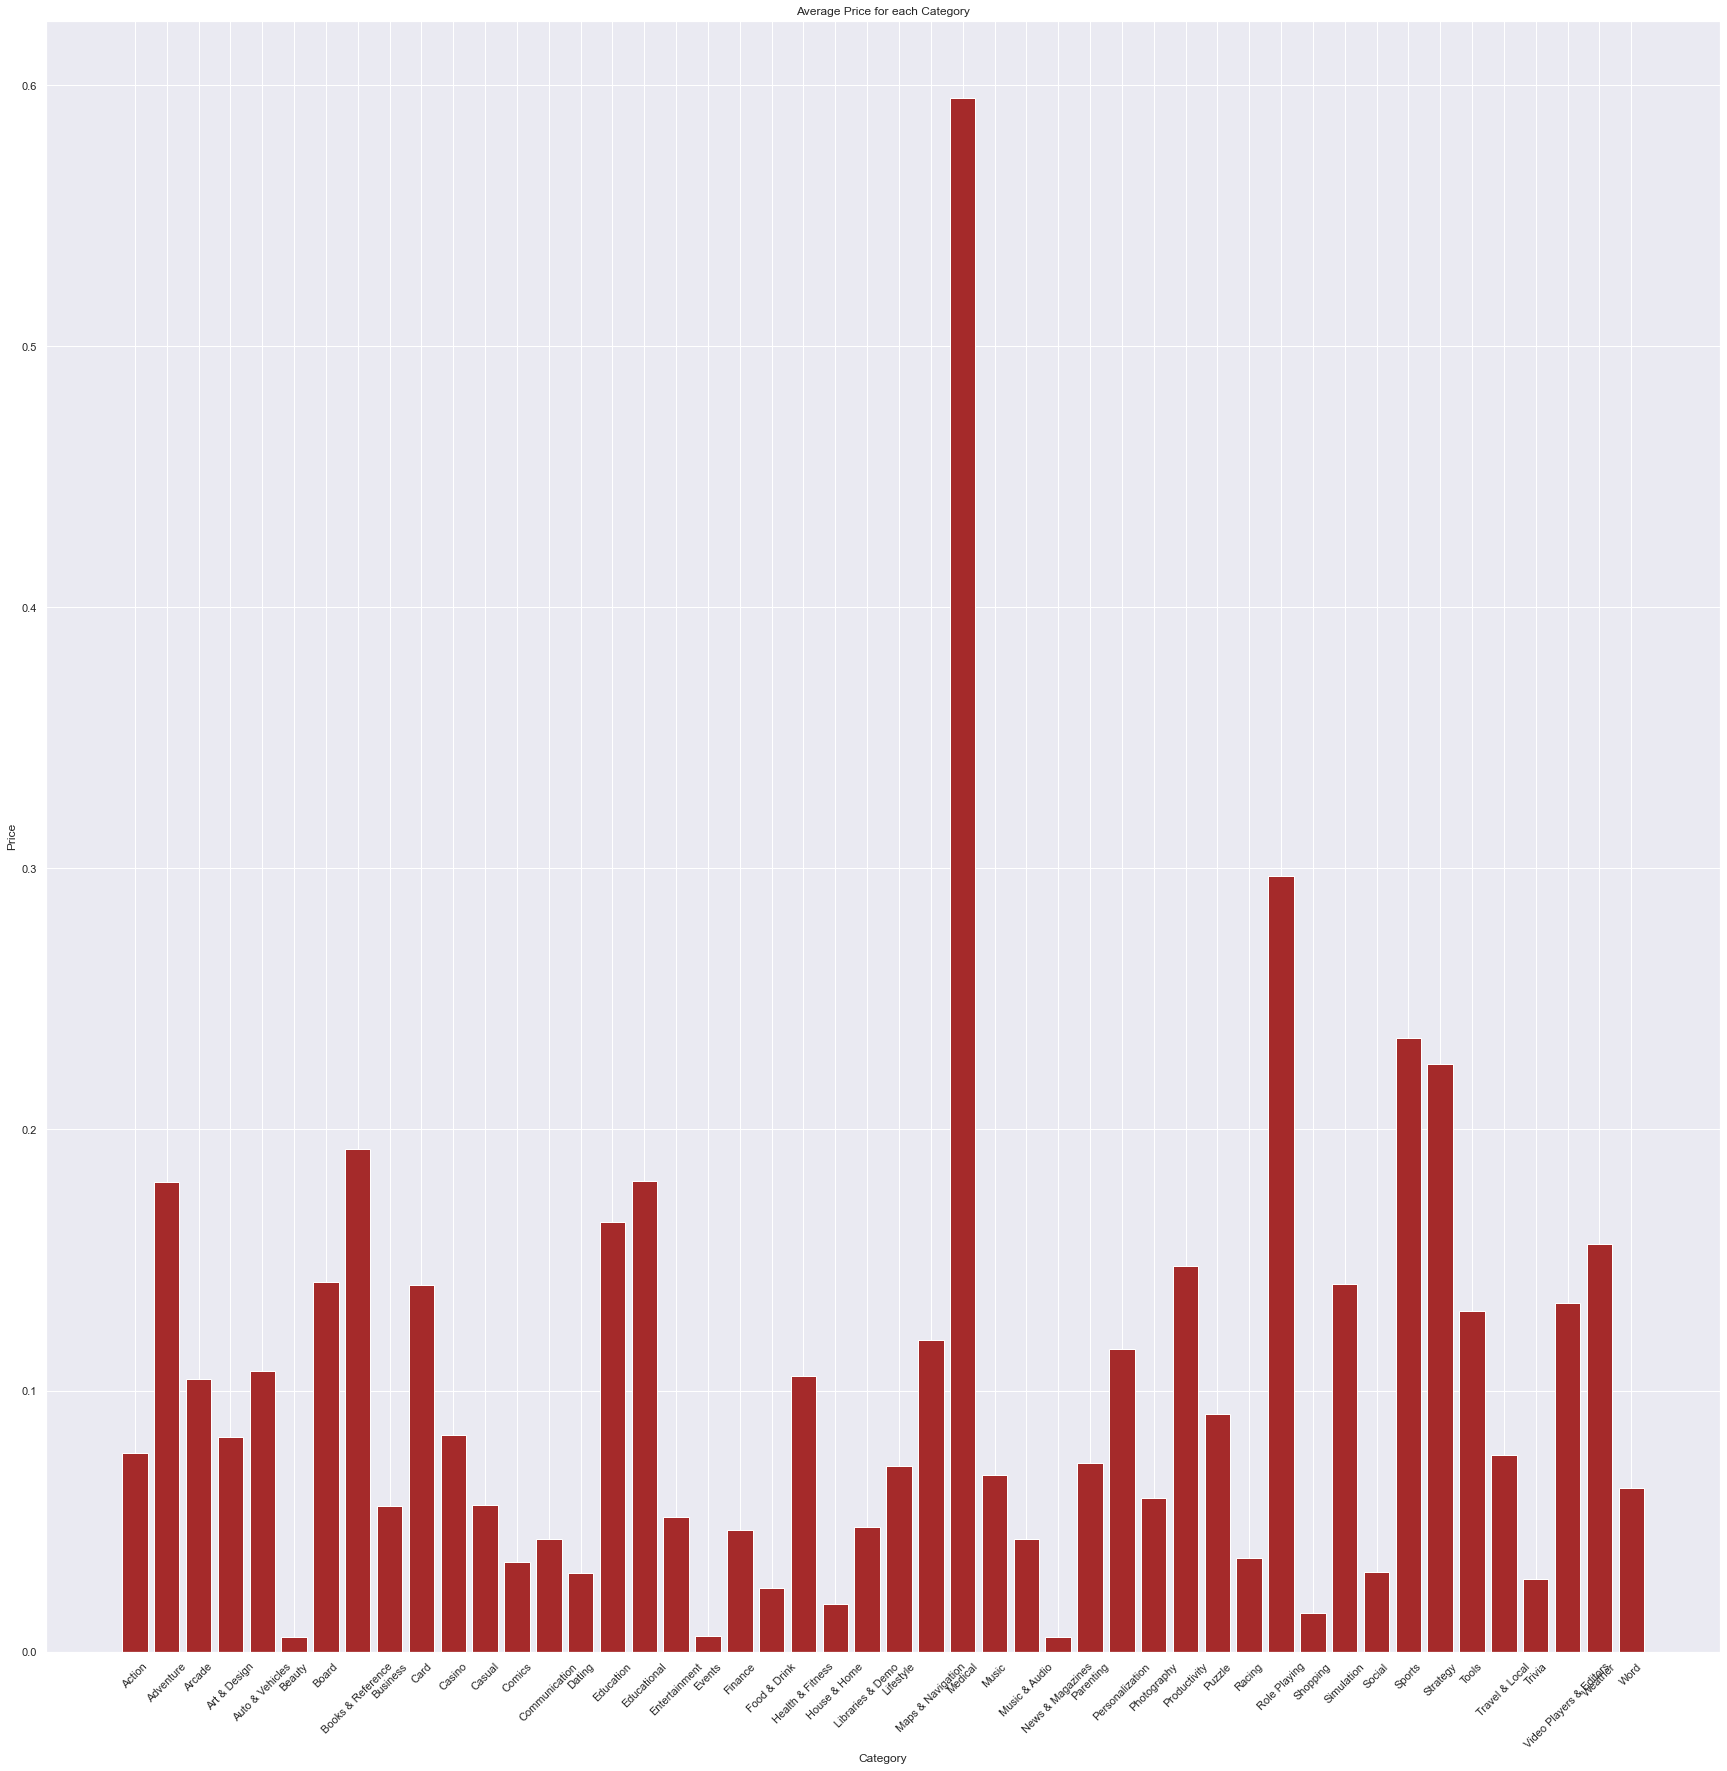

In [135]:
plt.figure(figsize=(30,30))
mean_OF_Price = df.groupby(['Category'])['Price'].mean().reset_index()
plt.bar(mean_OF_Price['Category'],mean_OF_Price['Price'],color = '#008000')
plt.xticks(rotation=45);
plt.title('Average Price for each Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.savefig('Average.png')
#plt.figure(figsize=(100,30))

In [136]:
df['Content Rating'].value_counts()

Everyone           916635
Teen                89233
Mature 17+          27217
Everyone 10+        15362
Adults only 18+        64
Unrated                64
Name: Content Rating, dtype: int64

[]

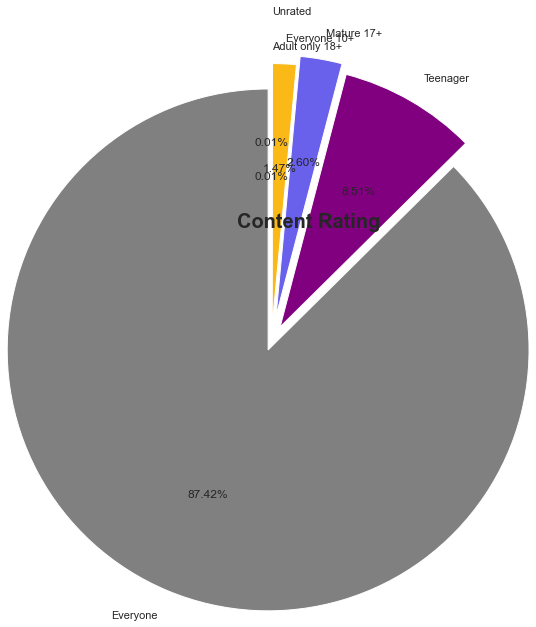

In [139]:
plt.pie(df['Content Rating'].value_counts(),explode=[0.1,0.2,0.3,0.2,0.5,0.1],autopct='%0.2f%%',
        labels=['Everyone','Teenager','Mature 17+','Everyone 10+','Unrated','Adult only 18+'],startangle=90,radius=3,
       colors=['#808080','#800080','#6960ec','#fbb917','#ff00ff','#00ff00'])
plt.title('Content Rating',fontdict={'size':20,'weight':'bold'},loc='right')
plt.plot()

# What is the most downloaded app?

In [140]:
df.loc[df['Maximum Installs']==df['Maximum Installs'].max()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
881403,YouTube,com.google.android.youtube,Video Players & Editors,4.4,112440547.0,Too Highly Installed,5.000000e+09,9766230924,True,0.0,...,https://support.google.com/youtube/topic/24225...,ytandroid-support@google.com,20-Oct-10,16-Jun-21,Teen,http://www.google.com/policies/privacy,True,False,False,6/16/2021 10:28


# What is the most famous category of the app?

In [141]:
df_draft=(df.groupby('Category')['Maximum Installs'].sum()).to_frame()
df_draft

df_draft.loc[df_draft['Maximum Installs']==sorted(df_draft['Maximum Installs'])[-1]]

,Maximum Installs
Category,
Communication,35932111584


In [142]:
df_draft.loc[df_draft['Maximum Installs']==sorted(df_draft['Maximum Installs'])[-2]]

,Maximum Installs
Category,
Tools,34133542759


<AxesSubplot:ylabel='Category'>

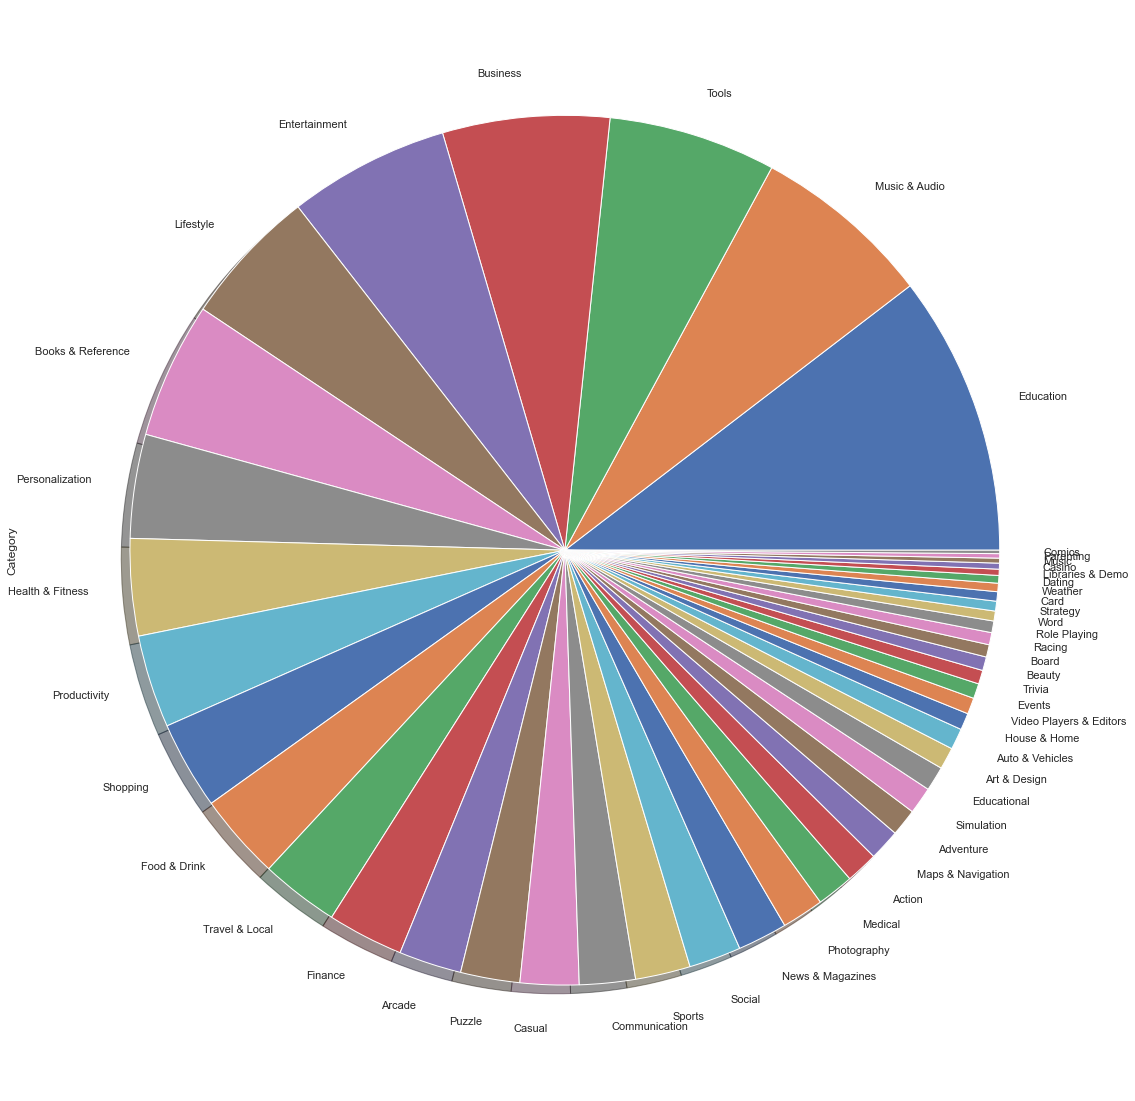

In [143]:
plt.figure(figsize=(20,20))

df.Category.value_counts().plot(kind='pie',shadow = True)

In [144]:
df.loc[df['Rating']==df['Rating'].max()]


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,Too Low Installed,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,10-Sep-18,13-Oct-18,Everyone,NaN,True,False,False,6/15/2021 20:19
17,All in one shopping app,com.tkapplications.allinoneshoppingapp,Tools,5.0,6.0,Too Low Installed,50.0,62,True,0.0,...,NaN,tkapplications001@gmail.com,24-Apr-19,5-May-19,Everyone,NaN,False,False,False,6/15/2021 20:19
42,Niagara Falls Wallpapers,com.niagara.wallpapers.backgrounds_0001,Personalization,5.0,11.0,Too Low Installed,500.0,825,True,0.0,...,NaN,legendapplication@gmail.com,30-May-20,30-May-20,Teen,NaN,True,False,False,6/15/2021 20:19
43,Extrude Balance,com.creatorsbureau.extrudebalance,Arcade,5.0,8.0,Too Low Installed,1000.0,3427,True,0.0,...,NaN,creatorsbureau@gmail.com,8-Jul-19,1-May-21,Everyone,https://unity3d.com/legal/privacy-policy,True,True,False,6/15/2021 20:19
72,Triple Point Academy,co.varys.sinbd,Education,5.0,5.0,Too Low Installed,10.0,18,True,0.0,...,NaN,support@classplus.co,15-Oct-20,13-Jun-21,Everyone,https://bit.ly/33pSGFX,False,False,False,6/15/2021 20:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048425,Bihar STET Paper-1 (English) Mock Tests App,com.edugorilla.biharstetenglish,Education,5.0,7.0,Too Low Installed,500.0,516,True,0.0,...,https://testseries.edugorilla.com/tests/1300/b...,developer@edugorilla.com,17-Jan-20,13-Jun-21,Everyone,https://edugorilla.com/privacy-policy-2/,False,False,False,6/16/2021 13:05
1048447,কিসমিস খাওয়ার উপকারিতা,com.boishakhiapps.KismiserUpokarita,Books & Reference,5.0,5.0,Too Low Installed,1000.0,2785,True,0.0,...,https://boishakhiapps.blogspot.com/,jusnamal@gmail.com,16-Sep-17,6-Dec-20,Everyone,NaN,True,False,False,6/16/2021 13:05
1048469,HarineTaxi_Owner,cockatoo.harinetaxi_owner,Maps & Navigation,5.0,16.0,Too Low Installed,50.0,62,True,0.0,...,http://www.harinetaxi.com,kockatooindia@gmail.com,30-Dec-18,4-Feb-20,Everyone,http://harinetaxi.com/privacypolicy,False,False,False,6/16/2021 13:05
1048480,DungScape,com.starman.celestialdungeons,Adventure,5.0,20.0,Too Low Installed,100.0,225,True,0.0,...,NaN,apps.starman@gmail.com,26-Nov-19,26-Nov-19,Everyone,https://docs.google.com/document/d/1ccwjEh0Wsx...,True,False,False,6/16/2021 13:05


# 4-Dataset

Check the features:

In [193]:
df['Category'].value_counts()

20    109089
23     70311
1      65331
26     65008
15     62673
6      53838
12     53030
7      40464
19     37770
2      36184
21     34292
11     33480
10     30502
28     29625
16     24425
14     23104
30     22846
3      21774
24     21435
4      20336
29     19398
18     16366
13     14402
40     12551
9      12137
0      10570
41     10507
27      9561
31      8489
17      8196
32      6562
39      6321
34      5856
35      5370
25      5339
22      4831
8       4742
44      4537
38      3862
37      3822
33      3666
36      3274
43      2996
5       2412
45      2319
42      1924
47      1725
46      1323
Name: Category, dtype: int64

In [194]:
df["Editors Choice"].value_counts()

0    1048186
1        389
Name: Editors Choice, dtype: int64

In [195]:
df["Free"].value_counts()

1    1028002
0      20573
Name: Free, dtype: int64

In [196]:
df["Content Rating"].value_counts()

0    916635
1     89233
2     27217
3     15362
4        64
5        64
Name: Content Rating, dtype: int64

Factorizing some important featutes from string to int

In [197]:
df['Content Rating'] = pd.factorize(df['Content Rating'])[0].astype(int)
df['Category'] = pd.factorize(df['Category'])[0].astype(int)


df["Editors Choice"]=df["Editors Choice"].replace({True:1,False:0})
df["Ad Supported"]=df["Ad Supported"].replace({True:1,False:0})
df["In App Purchases"]=df["In App Purchases"].replace({True:1,False:0})
df["Free"]=df["Free"].replace({True:1,False:0})

The features after the factorization:

In [198]:
df["Content Rating"].value_counts()

0    916635
1     89233
2     27217
3     15362
4        64
5        64
Name: Content Rating, dtype: int64

In [199]:
df["Free"].value_counts()

1    1028002
0      20573
Name: Free, dtype: int64

In [200]:
df["Editors Choice"].value_counts()

0    1048186
1        389
Name: Editors Choice, dtype: int64

Saving the "Installs" labels into variable to use in the visualization:

In [201]:
InstallsLabels=pd.factorize(df['Installs'])[1].astype(str)
InstallsLabels

Index(['0', '1', '2', '3', '4'], dtype='object')

Handling the missing values in "Installs" column, by inserting "Too Low Installed" in the NA.

In [202]:
df['Installs'].fillna("Too Low Installed", inplace=True)

In [203]:
df['Installs'] = pd.factorize(df['Installs'])[0].astype(int)

In [204]:
df['Installs'].value_counts()

0    748831
1    265959
2     27379
3      6347
4        59
Name: Installs, dtype: int64

caculate and represent the correlation between variable in the dataset:

In [205]:
df.corr()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
App Name,1.000000,0.008947,-0.002454,-0.000737,-0.007044,0.000169,0.000110,-0.003800,0.002501,0.006324,-0.026460,0.003166,0.001560
Category,0.008947,1.000000,0.017514,0.004106,0.040164,-0.000052,0.000248,0.019288,-0.004042,0.079600,0.062779,0.096919,0.015807
Rating,-0.002454,0.017514,1.000000,0.011186,0.467793,0.012347,0.013857,-0.010395,-0.003308,0.038645,0.160744,0.153989,0.019537
Rating Count,-0.000737,0.004106,0.011186,1.000000,0.056355,0.549840,0.612030,0.001122,-0.000326,0.010720,0.004456,0.022013,0.146215
Installs,-0.007044,0.040164,0.467793,0.056355,1.000000,0.067858,0.074064,0.035302,-0.013656,0.074922,0.213646,0.253237,0.077224
Minimum Installs,0.000169,-0.000052,0.012347,0.549840,0.067858,1.000000,0.964354,0.001779,-0.000514,0.006474,0.002430,0.016613,0.073893
Maximum Installs,0.000110,0.000248,0.013857,0.612030,0.074064,0.964354,1.000000,0.001978,-0.000571,0.007692,0.003367,0.019408,0.080888
Free,-0.003800,0.019288,-0.010395,0.001122,0.035302,0.001779,0.001978,1.000000,-0.283975,-0.001937,0.124274,0.008805,-0.007273
Price,0.002501,-0.004042,-0.003308,-0.000326,-0.013656,-0.000514,-0.000571,-0.283975,1.000000,-0.000767,-0.035453,-0.003086,0.001426
Content Rating,0.006324,0.079600,0.038645,0.010720,0.074922,0.006474,0.007692,-0.001937,-0.000767,1.000000,0.117122,0.093226,0.020624


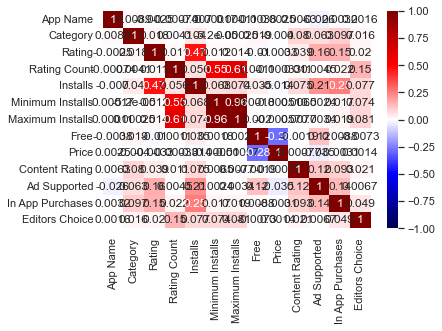

In [206]:
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

drop the unneeded columns:

In [207]:
df_draft=df.drop(['Currency','Minimum Android','Last Updated','Privacy Policy','Scraped Time','Developer Website'],1)
df_draft

C:\Users\lenovo\AppData\Local\Temp/ipykernel_1952/1209109271.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_draft=df.drop(['Currency','Minimum Android','Last Updated','Privacy Policy','Scraped Time','Developer Website'],1)


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Developer Id,Developer Email,Released,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,0,com.ishakwe.gakondo,0,0.0,0.0,0,10.0,15,1,0.00,10M,Jean Confident Irénée NIYIZIBYOSE,jean21101999@gmail.com,26-Feb-20,0,0,0,0
1,1,com.webserveis.batteryinfo,1,4.4,64.0,1,5000.0,7662,1,0.00,2.9M,Webserveis,webserveis@gmail.com,21-May-20,0,1,0,0
2,2,com.doantiepvien.crm,2,0.0,0.0,0,50.0,58,1,0.00,3.7M,Cabin Crew,vnacrewit@gmail.com,9-Aug-19,0,0,0,0
3,3,cst.stJoseph.ug17ucs548,3,5.0,5.0,0,10.0,19,1,0.00,1.8M,Climate Smart Tech2,climatesmarttech2@gmail.com,10-Sep-18,0,1,0,0
4,4,com.horodyski.grower,1,0.0,0.0,0,100.0,478,1,0.00,6.2M,Rafal Milek-Horodyski,rmilekhorodyski@gmail.com,21-Feb-20,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1007967,com.mafab.com.mafab_filmekadatbazisa,15,3.4,61.0,1,5000.0,9851,1,0.00,1.1M,Eureco,soos@mafab.hu,17-Aug-15,0,1,0,0
1048571,1007968,net.sinproject.android.tweecha.theme.pichan.ro...,4,0.0,0.0,0,10.0,15,0,1.49,1.9M,sinProject Inc.,info@sinproject.net,12-Nov-13,1,0,0,0
1048572,318842,com.dopaminit.sodapop,16,4.4,47.0,1,10000.0,22742,1,0.00,28M,DOPAMINIT,c8h11o2n1@gmail.com,19-Dec-18,0,1,1,0
1048573,1007969,com.app.qaribshopowner,11,0.0,0.0,0,5.0,9,1,0.00,21M,Dr Moin Hanif,Coldbloodedpredator@gmail.com,8-Jan-20,0,0,0,0


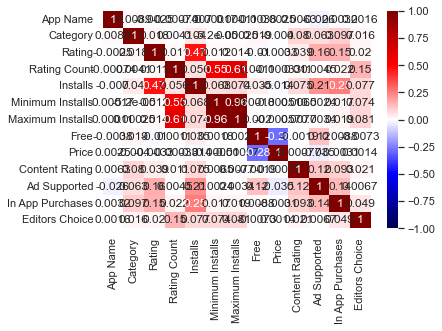

In [208]:
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [209]:
df_draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   App Name          1048575 non-null  int32  
 1   App Id            1048575 non-null  object 
 2   Category          1048575 non-null  int32  
 3   Rating            1038265 non-null  float64
 4   Rating Count      1038265 non-null  float64
 5   Installs          1048575 non-null  int32  
 6   Minimum Installs  1048529 non-null  float64
 7   Maximum Installs  1048575 non-null  int64  
 8   Free              1048575 non-null  int64  
 9   Price             1048575 non-null  float64
 10  Size              1048483 non-null  object 
 11  Developer Id      1048565 non-null  object 
 12  Developer Email   1048567 non-null  object 
 13  Released          1016542 non-null  object 
 14  Content Rating    1048575 non-null  int32  
 15  Ad Supported      1048575 non-null  int64  
 16  

In [210]:
df_draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   App Name          1048575 non-null  int32  
 1   App Id            1048575 non-null  object 
 2   Category          1048575 non-null  int32  
 3   Rating            1038265 non-null  float64
 4   Rating Count      1038265 non-null  float64
 5   Installs          1048575 non-null  int32  
 6   Minimum Installs  1048529 non-null  float64
 7   Maximum Installs  1048575 non-null  int64  
 8   Free              1048575 non-null  int64  
 9   Price             1048575 non-null  float64
 10  Size              1048483 non-null  object 
 11  Developer Id      1048565 non-null  object 
 12  Developer Email   1048567 non-null  object 
 13  Released          1016542 non-null  object 
 14  Content Rating    1048575 non-null  int32  
 15  Ad Supported      1048575 non-null  int64  
 16  

In [211]:
df_draft.isna().sum()

App Name                0
App Id                  0
Category                0
Rating              10310
Rating Count        10310
Installs                0
Minimum Installs       46
Maximum Installs        0
Free                    0
Price                   0
Size                   92
Developer Id           10
Developer Email         8
Released            32033
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

In [212]:
df['Price'].value_counts().head(10)

0.00    1028064
0.99       5427
1.99       2595
2.99       1801
1.49       1722
4.99       1165
3.99       1092
2.49       1021
3.49        575
9.99        396
Name: Price, dtype: int64

In [213]:
df['Rating Count'].value_counts()

0.0          480073
5.0           29194
6.0           24508
7.0           21391
8.0           18461
              ...  
39209.0           1
3136024.0         1
9402.0            1
60605.0           1
37375.0           1
Name: Rating Count, Length: 23829, dtype: int64

In [214]:
df_replaceMissing=df_draft
df_replaceMissing.isna().sum()

App Name                0
App Id                  0
Category                0
Rating              10310
Rating Count        10310
Installs                0
Minimum Installs       46
Maximum Installs        0
Free                    0
Price                   0
Size                   92
Developer Id           10
Developer Email         8
Released            32033
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

I have replaced the NA values in Rating col by the Median of the Rating col:

In [215]:
Rating_median = df_replaceMissing.Rating.median()
df_replaceMissing.Rating.fillna(Rating_median, inplace=True)

The missing values in 'Installs' and 'Minimum Installs' columns in the same rows. So, I have replaced NA in 'Installs' col by 'Too Low Installed' and in the 'Minimum Installs' by 0, to apear compatible together:

In [216]:
df_replaceMissing['Minimum Installs'].fillna(0, inplace=True)

In [217]:
RatingCount_median = df_replaceMissing['Rating Count'].median()
df_replaceMissing['Rating Count'].fillna(RatingCount_median, inplace=True)

The 'App Name' has 2 NA while 'App Id' did not have any NA. So, I have extract the App Name from App Id:

In [218]:
df_replaceMissing['App Name'].fillna(df_replaceMissing['App Id'],inplace=True)

I used split with '.com' instead of '@' as I may have the developer ID in the domain. Also, I have check if there is any NA value in the 'developer email' col where the 'developer id' NaN but alhamdulilah it is not:

In [219]:
df_replaceMissing['Developer Id'].fillna(((df_replaceMissing['Developer Email'].str.split('.com',1))[0])[0],inplace=True)

In [220]:
df_replaceMissing=df_replaceMissing.drop(['Developer Email'],1)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_1952/3238259132.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_replaceMissing=df_replaceMissing.drop(['Developer Email'],1)


In [221]:
Size_mode = df_replaceMissing['Size'].mode()
df_replaceMissing['Size'].fillna(Size_mode[0], inplace=True)

In [222]:
Size_mode = df_replaceMissing['Released'].mode()
df_replaceMissing['Released'].fillna(Size_mode[0], inplace=True)

At the end we have no NA values in df_replaceMissing...

In [223]:
df_replaceMissing.isna().sum()

App Name            0
App Id              0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Free                0
Price               0
Size                0
Developer Id        0
Released            0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

# Models

In [161]:
# Split into input and output features
y = df["Rating"]
X = df[["Minimum Installs","Maximum Installs"]]
X.head()

,Minimum Installs,Maximum Installs
0,10.0,15
1,5000.0,7662
2,50.0,58
3,10.0,19
4,100.0,478


In [162]:
y.head()

0    0.0
1    4.4
2    0.0
3    5.0
4    0.0
Name: Rating, dtype: float64

In [163]:
# Split into test and training sets
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

In [164]:
X_train

,Minimum Installs,Maximum Installs
472430,10000.0,14691
918237,10000.0,18239
700390,50.0,82
116324,5.0,7
62646,100.0,315
...,...,...
759363,1000.0,2403
535030,50.0,69
573977,5000.0,6900
189636,100000.0,116184


In [165]:
X_test

,Minimum Installs,Maximum Installs
497803,500000.0,504431
522706,10.0,28
704218,100.0,338
857273,50.0,79
823617,10000.0,19079
...,...,...
190880,100.0,170
219821,1000.0,1656
36315,5000.0,6331
124688,1000.0,1202


In [166]:
y_train

472430    4.4
918237    2.7
700390    0.0
116324    0.0
62646     0.0
         ... 
759363    4.3
535030    0.0
573977    4.1
189636    3.6
585903    0.0
Name: Rating, Length: 702545, dtype: float64

In [167]:
y_test

497803    4.4
522706    0.0
704218    1.6
857273    0.0
823617    3.9
         ... 
190880    0.0
219821    4.2
36315     4.2
124688    0.0
715786    5.0
Name: Rating, Length: 346030, dtype: float64

In [168]:
y = df.Rating
X = df.drop(columns=['Rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (786431, 23) (786431,)
Test (262144, 23) (262144,)


In [97]:
#df = df.replace(r'^\s*$', np.nan, regex=True)

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# -----

In [99]:
x=df.drop(columns='Rating')
y=df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [100]:
X=df.drop('Rating', axis = 1).values

In [101]:
y=df['Rating'].values

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [103]:
scaler = MinMaxScaler()

In [104]:
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler


In [224]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583125 entries, 0 to 1048567
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   App Name           583125 non-null  object 
 1   App Id             583125 non-null  object 
 2   Category           583125 non-null  object 
 3   Rating             583125 non-null  float64
 4   Rating Count       583125 non-null  float64
 5   Installs           583125 non-null  object 
 6   Minimum Installs   583125 non-null  float64
 7   Maximum Installs   583125 non-null  int64  
 8   Free               583125 non-null  bool   
 9   Price              583125 non-null  float64
 10  Currency           583125 non-null  object 
 11  Size               583125 non-null  object 
 12  Minimum Android    583125 non-null  object 
 13  Developer Id       583125 non-null  object 
 14  Developer Website  583125 non-null  object 
 15  Developer Email    583125 non-null  object 
 16  R

In [225]:
df_replaceMissing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   App Name          1048575 non-null  int32  
 1   App Id            1048575 non-null  object 
 2   Category          1048575 non-null  int32  
 3   Rating            1048575 non-null  float64
 4   Rating Count      1048575 non-null  float64
 5   Installs          1048575 non-null  int32  
 6   Minimum Installs  1048575 non-null  float64
 7   Maximum Installs  1048575 non-null  int64  
 8   Free              1048575 non-null  int64  
 9   Price             1048575 non-null  float64
 10  Size              1048575 non-null  object 
 11  Developer Id      1048575 non-null  object 
 12  Released          1048575 non-null  object 
 13  Content Rating    1048575 non-null  int32  
 14  Ad Supported      1048575 non-null  int64  
 15  In App Purchases  1048575 non-null  int64  
 16  

# Regression Models

In [226]:
X_replaceMissing_reg = df_replaceMissing.drop(['Rating','Released','App Name','App Id','Size','Developer Id'],1)
Y_replaceMissing_reg = df_replaceMissing[['Rating']]

C:\Users\lenovo\AppData\Local\Temp/ipykernel_1952/2521940306.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_replaceMissing_reg = df_replaceMissing.drop(['Rating','Released','App Name','App Id','Size','Developer Id'],1)


In [227]:
X_train_RM_reg, X_test_RM_reg, y_train_RM_reg, y_test_RM_reg = train_test_split(X_replaceMissing_reg, Y_replaceMissing_reg, 
                                                    test_size = 0.2, random_state=42)

# Linear Regression

In [228]:
linReg1 = LinearRegression()
linReg1.fit(X_train_RM_reg, y_train_RM_reg)
# Predicting the Test set results
y_pred = linReg1.predict(X_test_RM_reg)
print("Score= ",linReg1.score(X_test_RM_reg, y_pred))
print("RMSE", mean_squared_error(y_test_RM_reg, y_pred, squared=False))

Score=  1.0
RMSE 1.851031457914446


# Decision Tree Regressor

In [230]:
DT_reg1 = DecisionTreeRegressor(max_depth=2)
DT_reg1.fit(X_train_RM_reg, y_train_RM_reg)
# Predicting the Test set results
y_pred = DT_reg1.predict(X_test_RM_reg)
print("Score= ",DT_reg1.score(X_test_RM_reg, y_pred))

print("RMSE", mean_squared_error(y_test_RM_reg, y_pred, squared=False))

Score=  1.0
RMSE 0.49742465553583876


# Random Forest Regressor

In [231]:
RF_reg1=RandomForestRegressor(n_estimators=100)  #max_depth=2, random_state=0
RF_reg1.fit(X_train_RM_reg, y_train_RM_reg)
# Predicting the Test set results
y_pred = RF_reg1.predict(X_test_RM_reg)
print("Score= ",RF_reg1.score(X_test_RM_reg, y_pred))
print("RMSE", mean_squared_error(y_test_RM_reg, y_pred, squared=False))

C:\Users\lenovo\AppData\Local\Temp/ipykernel_1952/987744287.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_reg1.fit(X_train_RM_reg, y_train_RM_reg)


Score=  1.0
RMSE 0.48826595062891864
